# Predict the variable " Value-Co2-emissions"

###  Import library

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline


## Preliminary: Load Data and Quality Assessment

In [2]:
path = 'C:/Users/Admin/machine_learning_4A/data/'

data = pd.read_csv(path+ 'global_data_on_sustainable_energy.csv')
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
data.isna().sum()


Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [4]:
print(data.duplicated().sum())

--- Loading ---
0


In [5]:
data.drop(columns='Electricity from fossil fuels (TWh)', inplace=True) # For pedagogic purpose


In [6]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [7]:
print(data.dtypes)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
Renewables (

In [8]:
data["Entity"]=pd.Categorical(data["Entity"],ordered=False)
data["Year"]=pd.Categorical(data["Year"],ordered=False)
data["Density\\n(P/Km2)"]=pd.to_numeric(data["Density\\n(P/Km2)"].str.replace(',', ''), errors='coerce')

In [9]:
data.dtypes

Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64
Value_co2_emissions_kt_by_country                                    float64

In [11]:
missing_rates = data.isnull().mean() * 100
print(missing_rates)

Entity                                                               0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Primary energy consumption per capita (kWh/person)                   0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Value_co2_emissions_kt_by_country                               

In [12]:
data.drop(columns=['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'], inplace=True)
# Delete the variables which have the high rate of missing values

In [13]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [14]:
data=data.dropna() # Delete all individuals which have missing values

In [15]:
print(data.shape)

(2868, 17)


In [19]:
data.isna().sum().sum()

0

In [32]:
data.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,76.584630,62.170084,35.802071,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,228.214784,6.581668e+05,18.140402,12.970486
std,31.510371,39.238548,30.024000,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,742.358140,1.705048e+06,24.924975,65.478645
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,53.237811,22.075000,9.187500,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,31.000000,2.974300e+04,1.650801,-10.940835
50%,97.000000,81.550000,28.790000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,83.000000,1.319570e+05,17.060816,18.643501
75%,100.000000,100.000000,60.667500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,206.000000,4.881000e+05,39.399872,43.679291
max,100.000000,100.000000,96.040000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


### Statistique unidimensionnelle

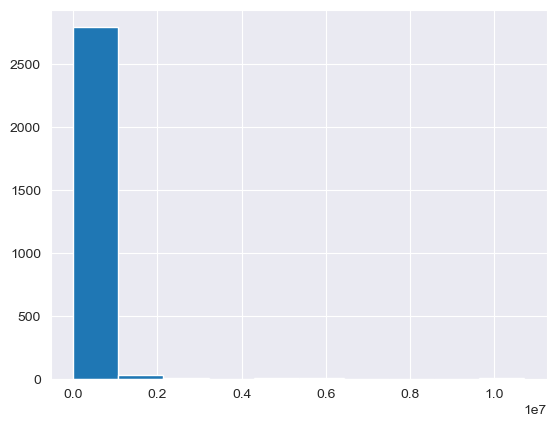

In [27]:
data['Value_co2_emissions_kt_by_country'].hist()
plt.show()